In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np


In [20]:
archivo_excel = "Data/results_dense_matrix.xlsx"  
data_dense_matrix = pd.read_excel(archivo_excel)
print(data_dense_matrix.head())

                                           Benchmark     n  Score (ms/op)  \
0  DenseMatrixBenchmarking.cacheBlockingMultiplic...    10          0.044   
1  DenseMatrixBenchmarking.cacheBlockingMultiplic...   100          1.805   
2  DenseMatrixBenchmarking.cacheBlockingMultiplic...   300         28.420   
3  DenseMatrixBenchmarking.cacheBlockingMultiplic...   500        113.404   
4  DenseMatrixBenchmarking.cacheBlockingMultiplic...  1000        821.262   

   Memory(KB)  
0         663  
1         835  
2        1335  
3        4213  
4       26350  


## Comparison execution time with dense matrix and different algorithms 

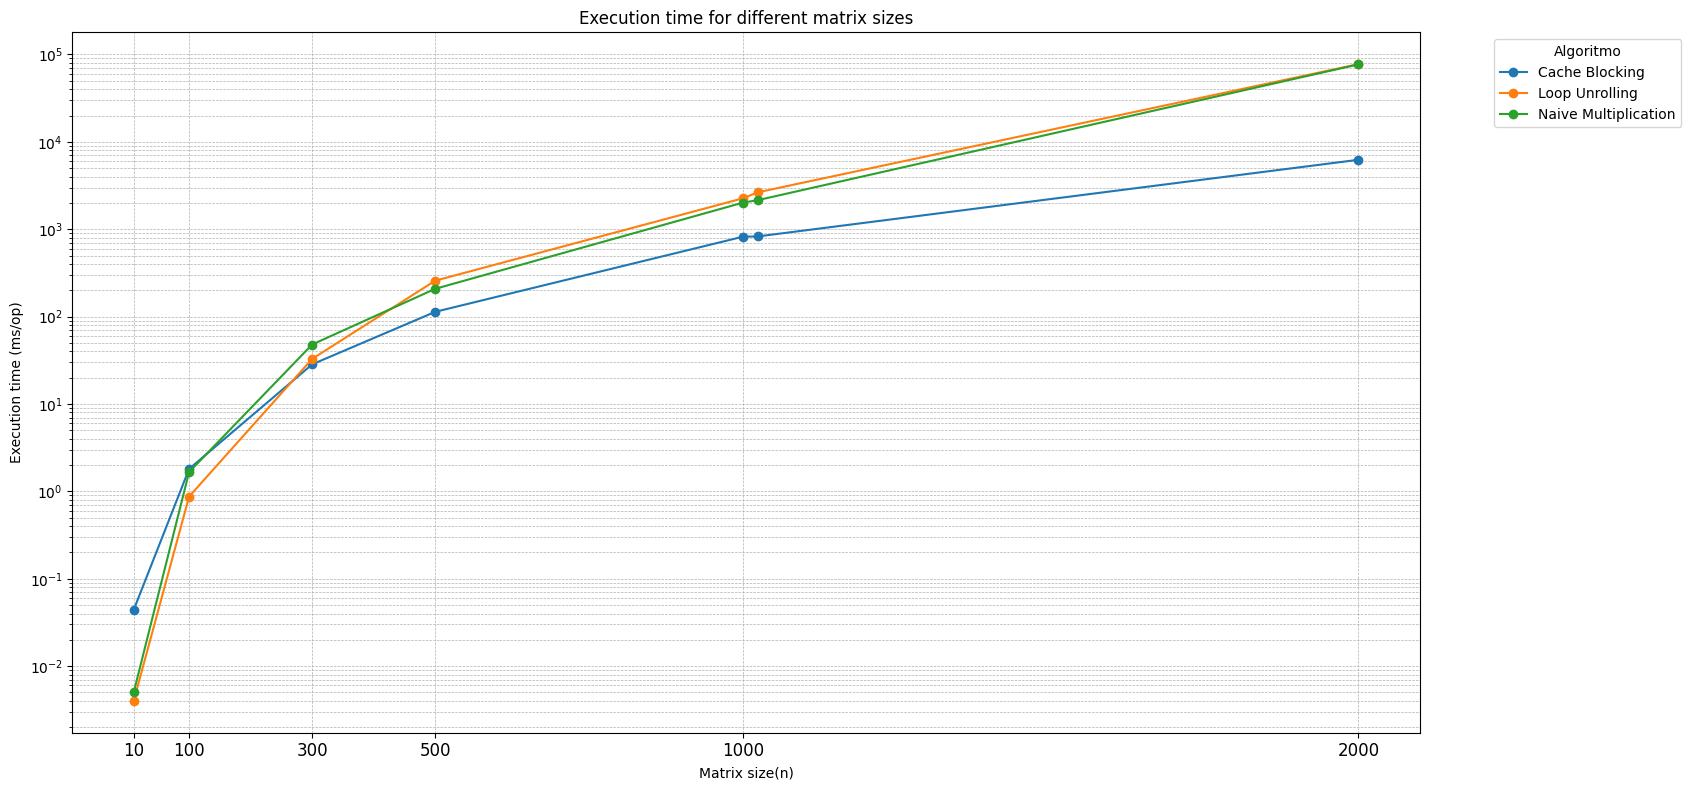

In [21]:
benchmark_names = {
    "DenseMatrixBenchmarking.cacheBlockingMultiplication": "Cache Blocking",
    "DenseMatrixBenchmarking.loopUnrollingMultiplication": "Loop Unrolling",
    "DenseMatrixBenchmarking.multiplication": "Naive Multiplication"
}


plt.figure(figsize=(17, 8))  
for benchmark in data_dense_matrix['Benchmark'].unique():
    subset = data_dense_matrix[data_dense_matrix['Benchmark'] == benchmark]
    plt.plot(subset['n'], subset['Score (ms/op)'], marker='o', label=benchmark_names.get(benchmark, benchmark))
    

plt.xticks(ticks=sorted(data_dense_matrix['n'].unique()), fontsize=12)
plt.title("Execution time for different matrix sizes")
plt.xlabel("Matrix size(n)")
plt.ylabel("Execution time (ms/op)")
plt.legend(title="Algoritmo", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)


ax = plt.gca()  
ax.yaxis.set_major_locator(MaxNLocator(prune='lower', nbins=10)) 

# Mostrar el gráfico
plt.xticks(ticks=[10, 100, 300, 500, 1000, 2000], fontsize=12)
plt.yscale("log")  
plt.tight_layout()
plt.show()


## Comparison Memory usage with dense matrix and different algorithms 

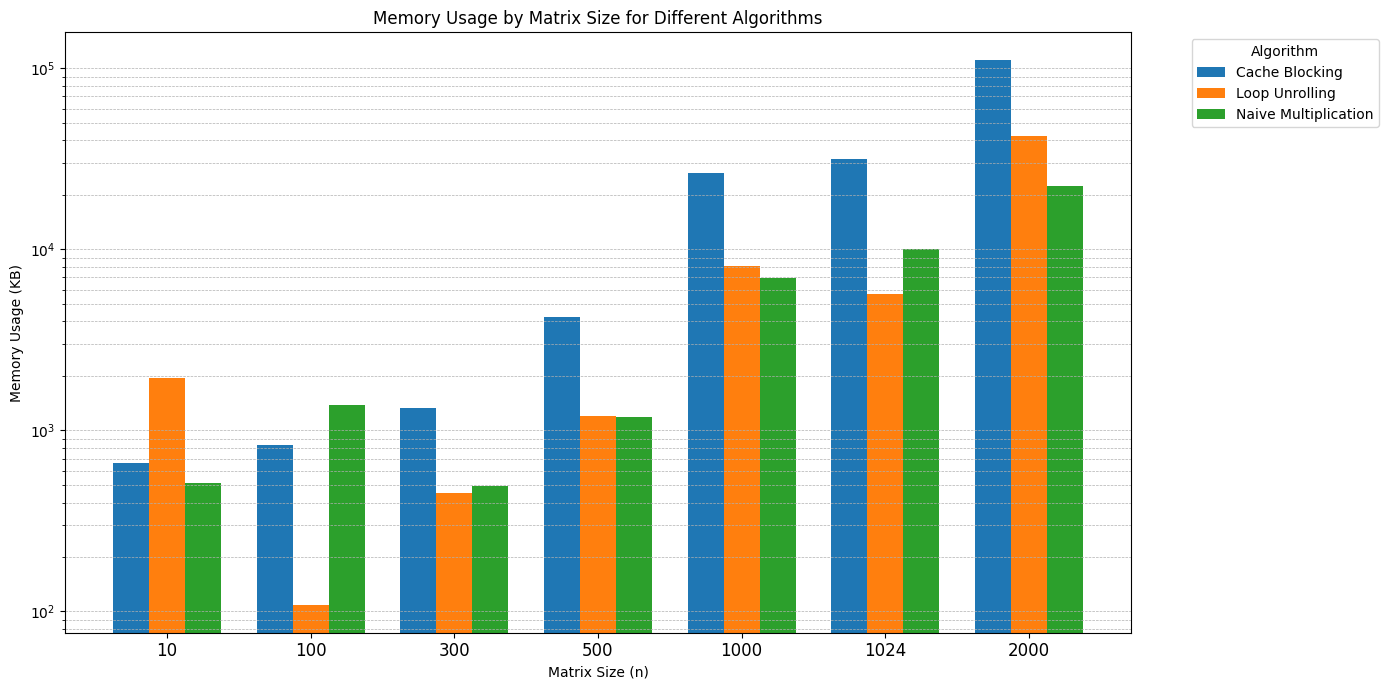

In [22]:
matrix_sizes = data_dense_matrix['n'].unique()
algorithms = data_dense_matrix['Benchmark'].unique()

bar_width = 0.25
positions = np.arange(len(matrix_sizes))

plt.figure(figsize=(14, 7))

for i, algorithm in enumerate(algorithms):
    subset = data_dense_matrix[data_dense_matrix['Benchmark'] == algorithm]
    plt.bar(positions + i * bar_width, subset['Memory(KB)'], width=bar_width, label=benchmark_names.get(algorithm, algorithm))

plt.xticks(positions + bar_width, matrix_sizes, fontsize=12)
plt.xlabel("Matrix Size (n)")
plt.ylabel("Memory Usage (KB)")
plt.title("Memory Usage by Matrix Size for Different Algorithms")
plt.yscale("log") 
plt.legend(title="Algorithm", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', which="both", linestyle="--", linewidth=0.5)

plt.tight_layout()

plt.show()

## Sparse Matrix Comparison CSR and CSC

In [23]:
archivo_excel = "Data/sparse_matrix.xlsx"  # Reemplaza con el nombre de tu archivo
data = pd.read_excel(archivo_excel)

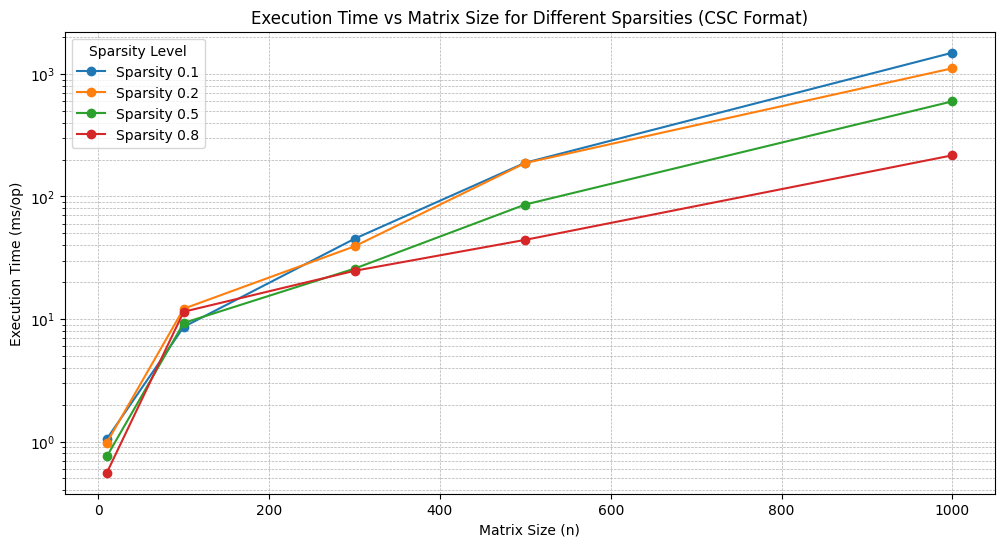

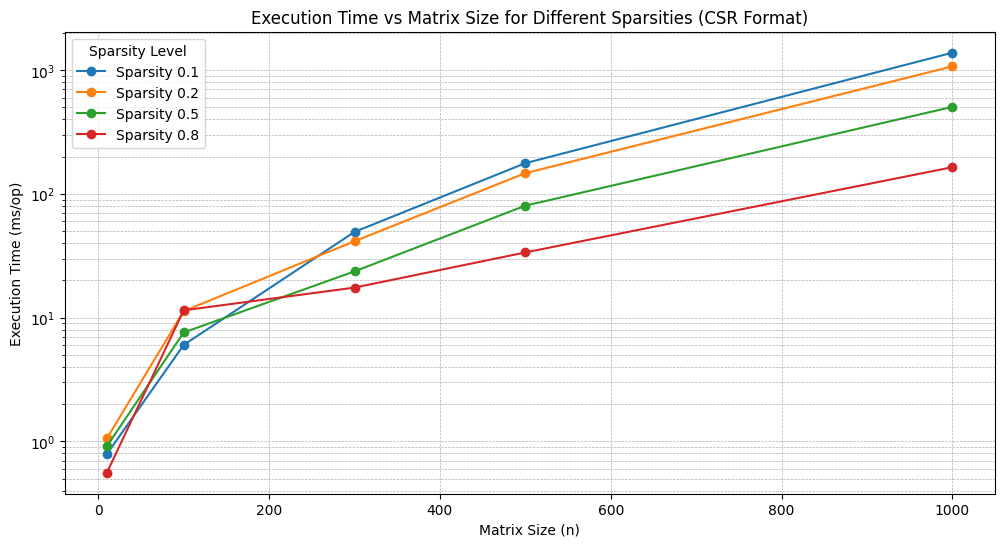

In [24]:
data['Score (ms/op)'] = pd.to_numeric(data['Score (ms/op)'].astype(str).str.replace(',', '.'), errors='coerce')
data['n'] = pd.to_numeric(data['n'], errors='coerce')
data['zeroPercentage'] = pd.to_numeric(data['zeroPercentage'], errors='coerce')

def plot_execution_time_separate_by_format():
    formats = ["CSC", "CSR"]
    for format_type in formats:
        plt.figure(figsize=(12, 6))
        
        for sparsity in sorted(data['zeroPercentage'].unique()):
            subset = data[(data['zeroPercentage'] == sparsity) & 
                          (data['Benchmark'].str.contains(format_type))]
            plt.plot(subset['n'], subset['Score (ms/op)'], marker='o', linestyle='-', 
                     label=f"Sparsity {sparsity}")
                
        plt.yscale("log")  
        plt.xlabel("Matrix Size (n)")
        plt.ylabel("Execution Time (ms/op)")
        plt.title(f"Execution Time vs Matrix Size for Different Sparsities ({format_type} Format)")
        plt.legend(title="Sparsity Level")
        plt.grid(True, which="both", linestyle="--", linewidth=0.5)
        plt.show()

plot_execution_time_separate_by_format()

## Memory Usage comparison with sparse matrix

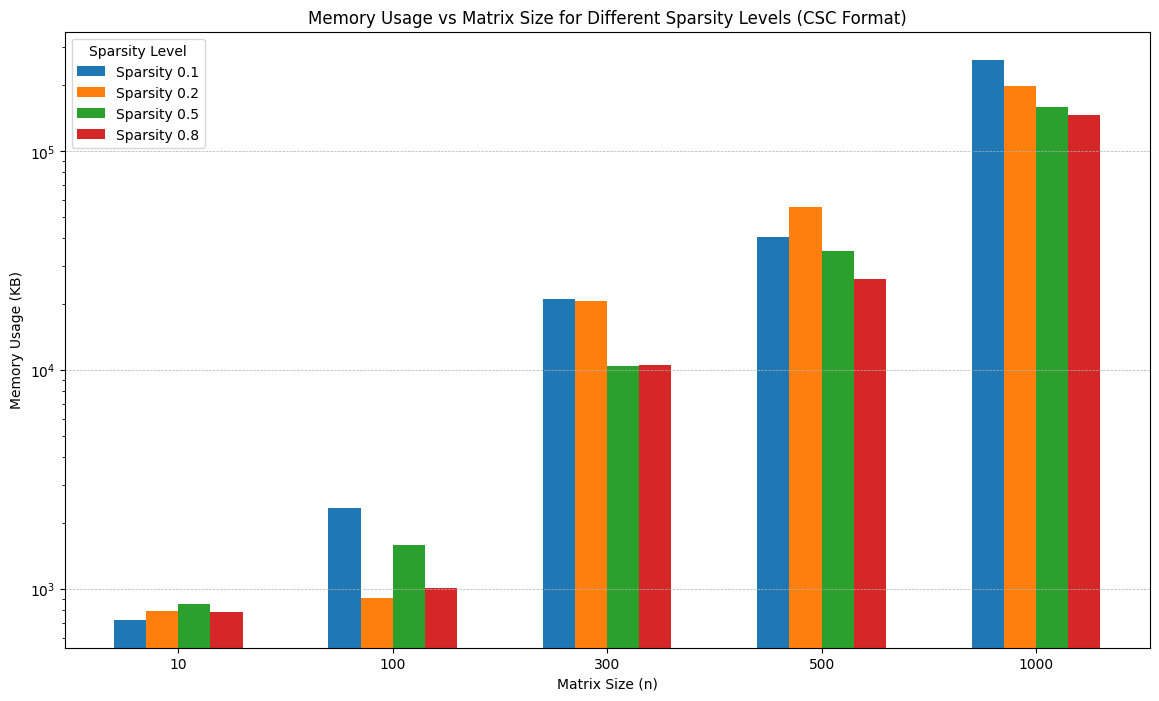

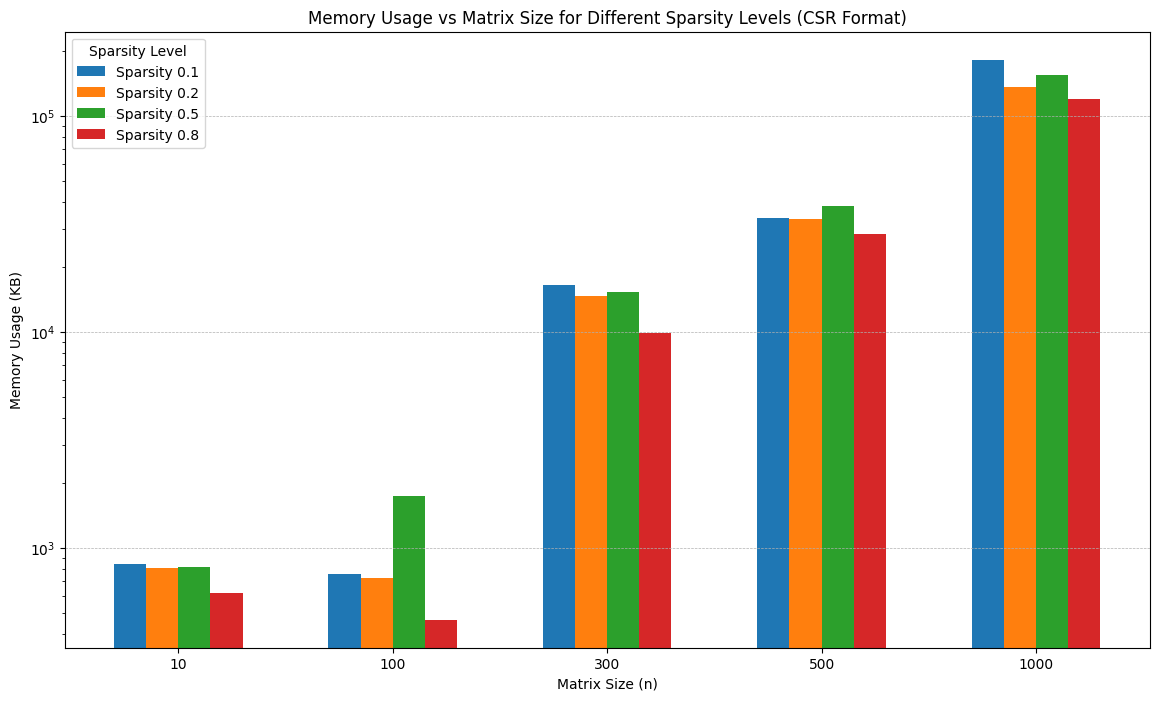

In [25]:
data['Memory(KB)'] = pd.to_numeric(data['Memory(KB)'], errors='coerce')
data['n'] = pd.to_numeric(data['n'], errors='coerce')
data['zeroPercentage'] = pd.to_numeric(data['zeroPercentage'], errors='coerce')

def plot_memory_usage_bar_by_matrix_size():
    formats = ["CSC", "CSR"]
    for format_type in formats:
        plt.figure(figsize=(14, 8))
        
        bar_width = 0.15
        matrix_sizes = sorted(data['n'].unique())
        
        x = np.arange(len(matrix_sizes))
        
        for i, sparsity in enumerate(sorted(data['zeroPercentage'].unique())):
            subset = data[(data['zeroPercentage'] == sparsity) & 
                          (data['Benchmark'].str.contains(format_type))]
           
            plt.bar(x + i * bar_width, subset['Memory(KB)'], width=bar_width, label=f"Sparsity {sparsity}")
            
           
        
        plt.yscale("log")
        plt.xlabel("Matrix Size (n)")
        plt.ylabel("Memory Usage (KB)")
        plt.title(f"Memory Usage vs Matrix Size for Different Sparsity Levels ({format_type} Format)")
        plt.xticks(x + bar_width * (len(data['zeroPercentage'].unique()) - 1) / 2, matrix_sizes)
        plt.legend(title="Sparsity Level")
        plt.grid(axis='y', linestyle="--", linewidth=0.5)
        plt.show()

plot_memory_usage_bar_by_matrix_size()


## Dense and Sparse Algorithms with 0% of zeros

In [26]:
archivo_excel = "Data/dense_sparse.xlsx" 
datos = pd.read_excel(archivo_excel)

print(datos.head())


                                           Benchmark    n  zeroPercentage  \
0  MatrixMultiplicationBenchmarking.cacheBlocking...   10             0.0   
1  MatrixMultiplicationBenchmarking.cacheBlocking...   10             0.2   
2  MatrixMultiplicationBenchmarking.cacheBlocking...   10             0.5   
3  MatrixMultiplicationBenchmarking.cacheBlocking...   10             0.8   
4  MatrixMultiplicationBenchmarking.cacheBlocking...  100             0.0   

   Score(ms/op)  
0         0.096  
1         0.169  
2         0.212  
3         0.272  
4         2.075  


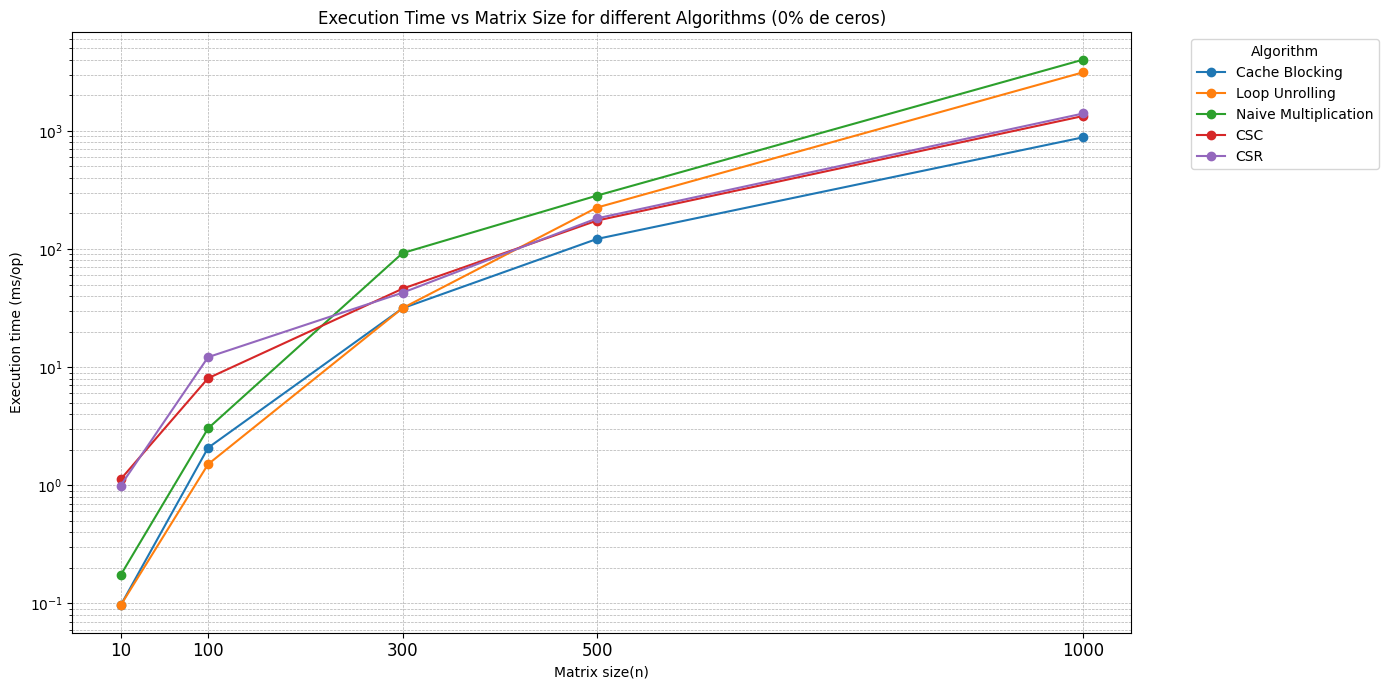

In [27]:
data_filtered = datos[datos['zeroPercentage'] == 0.0]

benchmark_names = {
    "MatrixMultiplicationBenchmarking.cacheBlockingMultiplication": "Cache Blocking",
    "MatrixMultiplicationBenchmarking.loopUnrollingMultiplication": "Loop Unrolling",
    "MatrixMultiplicationBenchmarking.multiplication": "Naive Multiplication",
    "MatrixMultiplicationBenchmarking.sparseCSR_CSRMultiplication": "CSR",
    "MatrixMultiplicationBenchmarking.sparseCSC_CSCMultiplication" : "CSC"
}


plt.figure(figsize=(14, 7)) 
for benchmark in data_filtered['Benchmark'].unique():
    subset = data_filtered[data_filtered['Benchmark'] == benchmark]
    plt.plot(subset['n'], subset['Score(ms/op)'], marker='o', label=benchmark_names.get(benchmark, benchmark))
    
plt.xticks(ticks=sorted(data_filtered['n'].unique()), fontsize=12)
plt.title("Execution Time vs Matrix Size for different Algorithms (0% de ceros)")
plt.xlabel("Matrix size(n)")
plt.ylabel("Execution time (ms/op)")
plt.yscale("log")  
plt.legend(title="Algorithm", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)


plt.tight_layout()
plt.show()


## Execution time for different matrices based on sparsity level

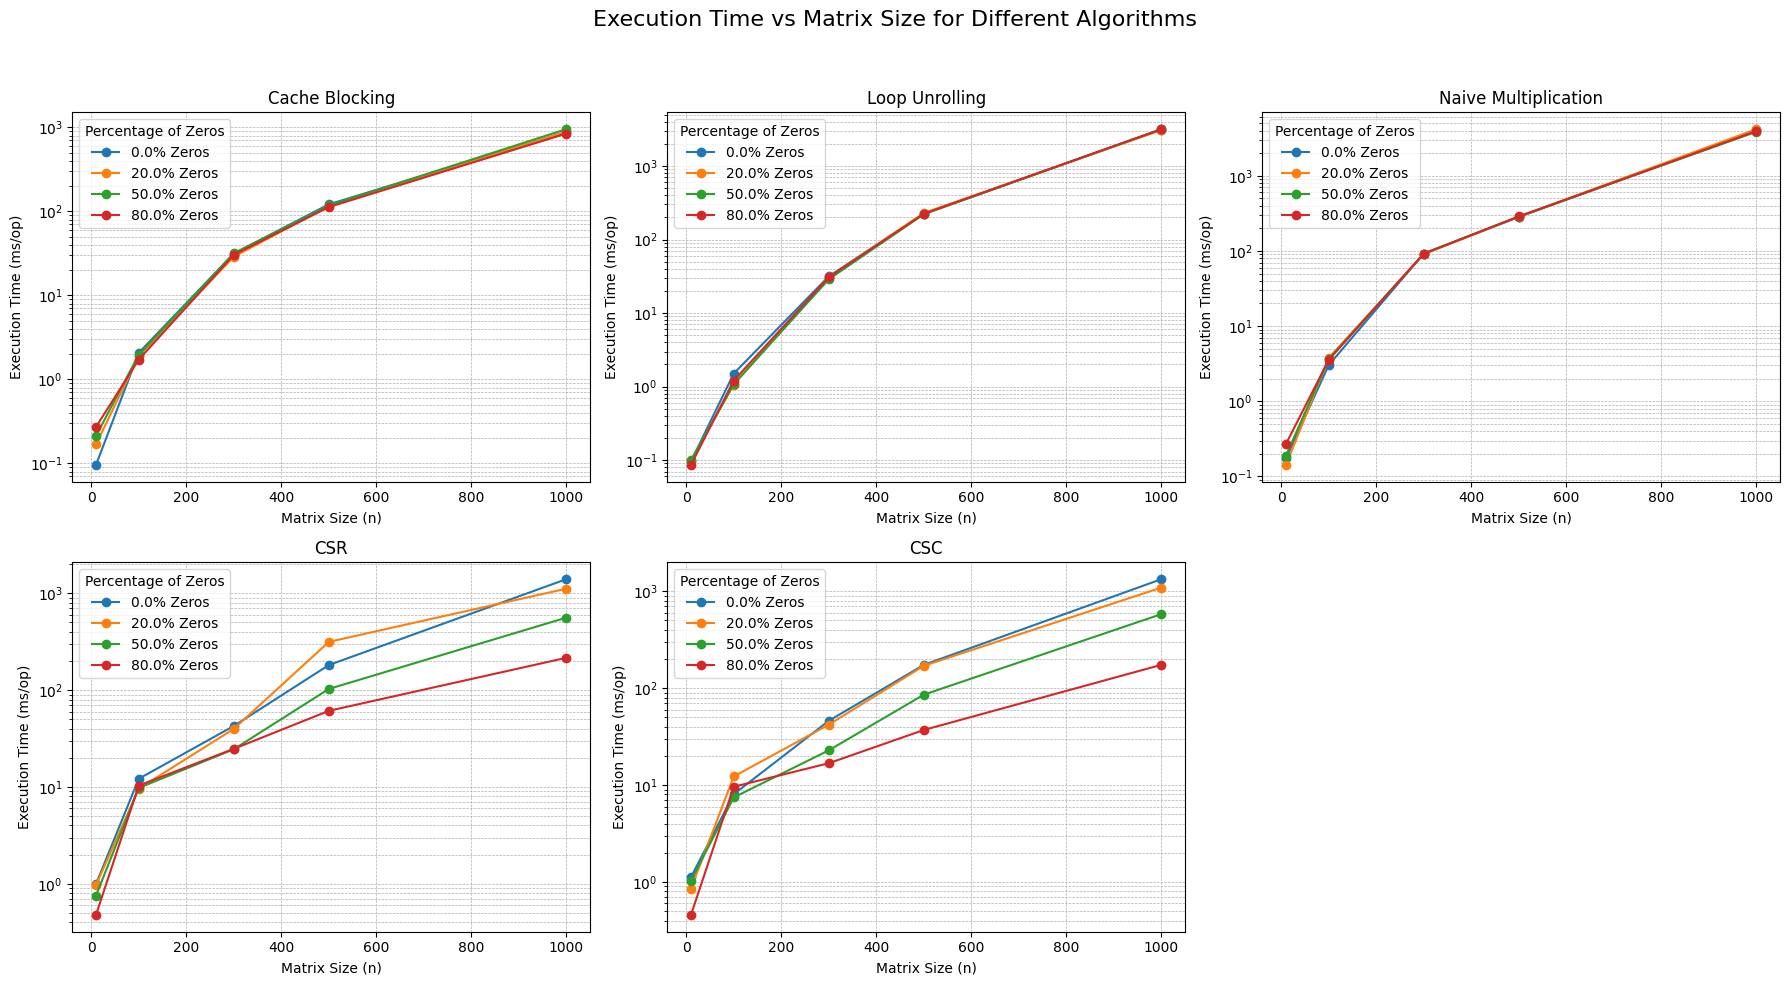

In [28]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10)) 
fig.suptitle("Execution Time vs Matrix Size for Different Algorithms", fontsize=16)

axes = axs.flatten()

for i, (benchmark, short_name) in enumerate(benchmark_names.items()):
    subset = datos[datos['Benchmark'] == benchmark]
    
    ax = axes[i]
    
    for zero_percentage in sorted(subset['zeroPercentage'].unique()):
        data_zero = subset[subset['zeroPercentage'] == zero_percentage]
        ax.plot(data_zero['n'], data_zero['Score(ms/op)'], marker='o', label=f"{zero_percentage * 100}% Zeros")
    
    # Customize each subplot
    ax.set_title(short_name)
    ax.set_xlabel("Matrix Size (n)")
    ax.set_ylabel("Execution Time (ms/op)")
    ax.set_yscale("log") 
    ax.grid(True, which="both", linestyle="--", linewidth=0.5)
    ax.legend(title="Percentage of Zeros")

axes[-1].axis('off')


plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()
